In [12]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [13]:
tickers = ['JPM', 'BAC']
data = yf.download(tickers, start="2018-01-01", end="2024-01-01")['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [14]:
asset1 = data['JPM']
asset2 = data['BAC']

In [15]:
price_ratio = asset1 / asset2

mean_ratio = price_ratio.mean()
std_ratio = price_ratio.std()

In [16]:
upper_threshold = mean_ratio + std_ratio
lower_threshold = mean_ratio - std_ratio

long_entry = price_ratio > upper_threshold
short_entry = price_ratio < lower_threshold
exit_signal = (price_ratio < upper_threshold) & (price_ratio > lower_threshold)

## Backtesting

/var/folders/w8/1f8bwyyx1ws53fvmw1lcp4vm0000gn/T/ipykernel_6816/3680548310.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if long_entry[i]:
/var/folders/w8/1f8bwyyx1ws53fvmw1lcp4vm0000gn/T/ipykernel_6816/3680548310.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif short_entry[i]:
/var/folders/w8/1f8bwyyx1ws53fvmw1lcp4vm0000gn/T/ipykernel_6816/3680548310.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  entry_price_rat

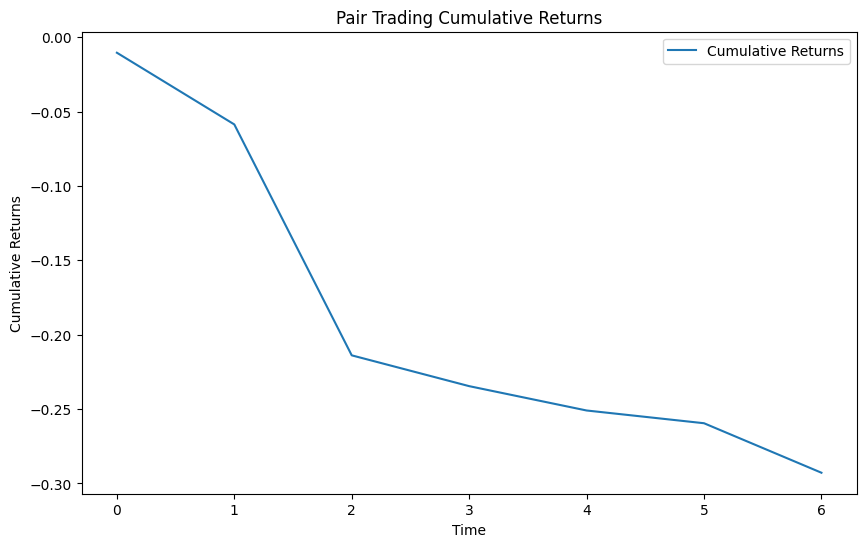

In [18]:
position = 0 
returns = []

for i in range(1, len(price_ratio)):
    if position == 0:  # No open position
        if long_entry[i]:
            position = 1
            entry_price_ratio = price_ratio[i]
        elif short_entry[i]:
            position = -1
            entry_price_ratio = price_ratio[i]
    
    elif position == 1:  # Long position
        if exit_signal[i]:
            profit = (price_ratio[i] - entry_price_ratio)
            returns.append(profit)
            position = 0
    
    elif position == -1:  # Short position
        if exit_signal[i]:
            profit = (entry_price_ratio - price_ratio[i])
            returns.append(profit)
            position = 0

cumulative_returns = np.cumsum(returns)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label="Cumulative Returns")
plt.title("Pair Trading Cumulative Returns")
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()


In [19]:
returns = np.array(returns)

sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(252)  # Assuming 252 trading days

print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

Sharpe Ratio: -13.81


## Price Ratio fluctuations around the thresholds

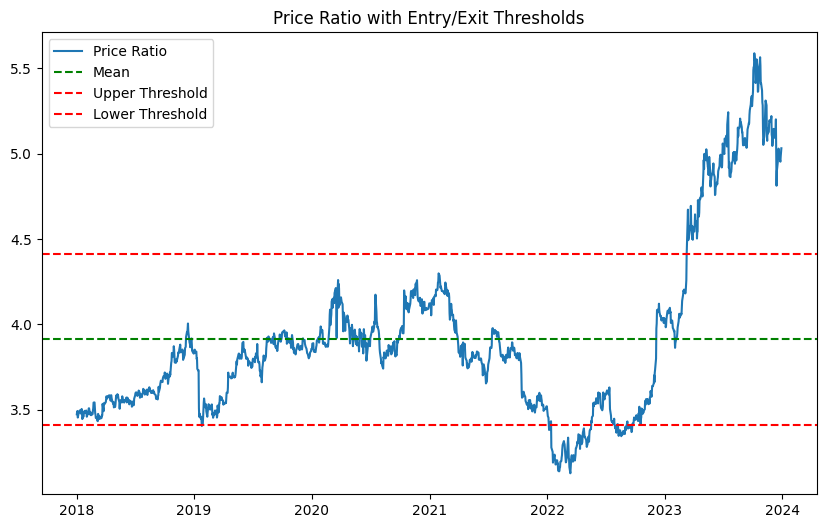

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(price_ratio, label='Price Ratio')
plt.axhline(mean_ratio, color='green', linestyle='--', label='Mean')
plt.axhline(upper_threshold, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(lower_threshold, color='red', linestyle='--', label='Lower Threshold')
plt.title('Price Ratio with Entry/Exit Thresholds')
plt.legend()
plt.show()